In [ ]:
import json
import networkx as nx
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from omegaconf import OmegaConf

sns.set_theme("notebook")

In [ ]:
# load the graph
with open("../../data/datasets/pl/graph/data/judgment_graph.json") as file:
    g_data = json.load(file)

g = nx.node_link_graph(g_data)
src_nodes, target_nodes = nx.bipartite.sets(g)

In [ ]:
config = OmegaConf.load("../../data/datasets/pl/graph/metadata.yaml")
OmegaConf.resolve(config)

## Dataset statistics

In [ ]:
stats = [
    ["#nodes", g.number_of_nodes()],
    ["#edges", g.number_of_edges()],
    ["#nodes (type=`judgement`)", len(src_nodes)],
    ["#nodes (type=`legal_base`)", len(target_nodes)],
    ["avg(degree)", round(sum(dict(g.degree()).values()) / g.number_of_nodes(), 2)],
]
print(tabulate(stats, headers=["feature", "value"], tablefmt="github", floatfmt=".2f"))

| feature                    |      value |
|----------------------------|------------|
| #nodes                     |  369033.00 |
| #edges                     | 1131458.00 |
| #nodes (type=`judgement`)  |  366213.00 |
| #nodes (type=`legal_base`) |    2820.00 |
| avg(degree)                |       6.13 |


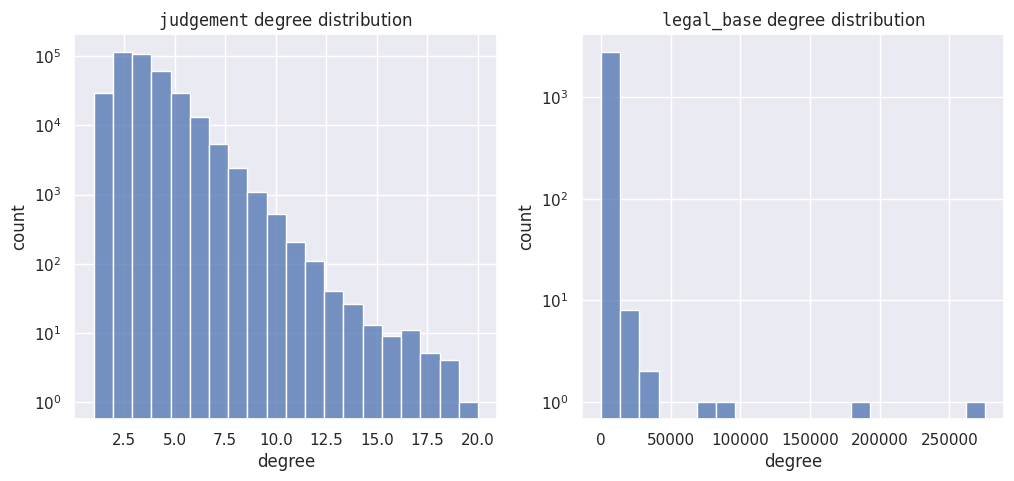

In [ ]:
src_degs = list(dict(nx.degree(g, nbunch=src_nodes)).values())
target_degs = list(dict(nx.degree(g, nbunch=target_nodes)).values())

_, (ax_src, ax_target) = plt.subplots(1, 2, figsize=(12, 5))
ax = sns.histplot(src_degs, bins=20, ax=ax_src)
ax.set(xlabel="degree", ylabel="count", title=r"$\mathtt{judgement}$ degree distribution", yscale="log")

ax = sns.histplot(target_degs, bins=20, ax=ax_target)
ax.set(xlabel="degree", ylabel="count", title=r"$\mathtt{legal\_base}$ degree distribution", yscale="log")

plt.show()